In [8]:
import json
import pandas as pd

# Load the JSONL file into a DataFrame
file_path_jsonl = "part-1.jsonl"
data = []
with open(file_path_jsonl, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Load the new JSONL file into a DataFrame
new_file_path_jsonl = "e190527b-d95a-3084-efd5-f0664ca332e0-jsonl.jsonl (1)"
data2 = []
with open(new_file_path_jsonl, 'r', encoding='utf-8') as file:
    for line in file:
        data2.append(json.loads(line))
df2 = pd.DataFrame(data2)

# Remove rows in df2 that are present in df based on the 'title' column
df_filtered = df2[~df2['title'].isin(df['title'])]

# Display the first few rows of the filtered DataFrame
pd.set_option('display.max_columns', None)
df_filtered.head()

,creator,datePublished,docSubType,docType,doi,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sourceCategory,tdmCategory,title,url,wordCount,unigramCount,bigramCount,trigramCount,abstract,volumeNumber,sequence
4,[I.F. Burton],1961-03-01,brief-report,article,10.1017/S0018246X00022214,ark://27927/pgh1h5wx761,"[{'name': 'local_publisher_id', 'value': 'S001...",The Historical Journal,1,"[marlborough, committee, war office, secretary...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",7,84,78,78-84,portico,1961,Cambridge University Press,NaN,"[Political science - Government, Political sci...",1. ‘The Committee of Council at the War-Office...,http://doi.org/10.1017/S0018246X00022214,4502,"{'Marlborough]': 1, 'modified': 1, 'army'.': 1...","{'instituted by': 2, 'has produced': 1, 'obser...","{'been found,5 but': 1, 'his authority and': 1...",NaN,4,5.0
6,[Bruce Collins],1978-09-01,review-article,article,10.1017/S0018246X00019853,ark://27927/pgh1h5t5gt2,"[{'name': 'local_publisher_id', 'value': 'S001...",The Historical Journal,3,"[democrats, politics, jacksonian, antislavery,...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",11,719,709,709-719,portico,1978,Cambridge University Press,NaN,[Philosophy - Applied philosophy],"Non-Sectional Issues in American Politics, 183...",http://doi.org/10.1017/S0018246X00019853,6038,"{'temperance,': 1, 'ideological.': 1, 'improve...","{'and on': 1, 'interests. In': 1, 'least, was'...","{'to inculcate a': 1, 'four of the': 1, 'God a...",NaN,21,13.0
7,[Norman Bennett],1989-03-01,"""book-review""",article,10.1017/S0021853700031066,ark://27927/pgh1g3wnd3w,"[{'name': 'local_publisher_id', 'value': 'S002...",The Journal of African History,1,"[tippu tip, renault, francois renault, cape co...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",2,187,186,186-187,portico,1989,Cambridge University Press,NaN,[Biological sciences - Biology],Review of Tippo Tip: un potentat arabe en Afri...,http://doi.org/10.1017/S0021853700031066,1007,"{'not': 3, 'plagued': 1, 'stated.': 1, 'author...","{'l 8': 1, 'extensive research': 1, 'the tempt...","{'Renault is unable': 1, 'and Smith's own': 1,...",NaN,30,24.0
9,[],1968-07-01,other,article,10.1017/S0021853700008616,ark://27927/pgh1g3x3m02,"[{'name': 'local_publisher_id', 'value': 'S002...",The Journal of African History,3,"[reviewed, roger anstey, article, africa, geor...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",11,xiii,iii,iii-xiii,portico,1968,Cambridge University Press,NaN,[Arts - Performing arts],Contents List and Index,http://doi.org/10.1017/S0021853700008616,4093,"{'VAN': 2, '1910',': 2, ''Mkwawa': 2, 'the',':...","{'Christopher Fyfe,': 5, 'independant du': 2, ...","{'Gaspard Theodore Mollien,': 1, 'development ...",NaN,9,2.0
13,[HENRY B. LOVEJOY],2020-03-01,book-review,article,10.1017/S0021853720000225,ark://27927/phzdvpq9gd4,"[{'name': 'local_publisher_id', 'value': 'S002...",The Journal of African History,1,"[fugitive modernities, maroon communities, afr...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",2,138,137,137-138,portico,2020,Cambridge University Press,NaN,[Philosophy - Applied philosophy],FUGITIVE MODERNITIES IN WEST CENTRAL AFRICA,http://doi.org/10.1017/S0021853720000225,876,"{'Her': 3, 'Those': 1, 'Kafuxi': 1, 'understan...","{'the underpinnings': 1, 'and roles': 1, 'Prin...","{'that maroon communities': 1, 'based on a': 1...",NaN,61,22.0


In [11]:
# Count the number of titles from each journal in the 'isPartOf' column
journal_counts = df_filtered['isPartOf'].value_counts()

# Display the results
print(journal_counts)

isPartOf
The Historical Journal            2581
The Journal of African History    2343
History Workshop Journal           427
Past & Present                      57
Name: count, dtype: int64


In [12]:
df_filtered.head(100)

,creator,datePublished,docSubType,docType,doi,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sourceCategory,tdmCategory,title,url,wordCount,unigramCount,bigramCount,trigramCount,abstract,volumeNumber,sequence
4,[I.F. Burton],1961-03-01,brief-report,article,10.1017/S0018246X00022214,ark://27927/pgh1h5wx761,"[{'name': 'local_publisher_id', 'value': 'S001...",The Historical Journal,1,"[marlborough, committee, war office, secretary...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",7,84,78,78-84,portico,1961,Cambridge University Press,NaN,"[Political science - Government, Political sci...",1. ‘The Committee of Council at the War-Office...,http://doi.org/10.1017/S0018246X00022214,4502,"{'Marlborough]': 1, 'modified': 1, 'army'.': 1...","{'instituted by': 2, 'has produced': 1, 'obser...","{'been found,5 but': 1, 'his authority and': 1...",NaN,4,5.0
6,[Bruce Collins],1978-09-01,review-article,article,10.1017/S0018246X00019853,ark://27927/pgh1h5t5gt2,"[{'name': 'local_publisher_id', 'value': 'S001...",The Historical Journal,3,"[democrats, politics, jacksonian, antislavery,...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",11,719,709,709-719,portico,1978,Cambridge University Press,NaN,[Philosophy - Applied philosophy],"Non-Sectional Issues in American Politics, 183...",http://doi.org/10.1017/S0018246X00019853,6038,"{'temperance,': 1, 'ideological.': 1, 'improve...","{'and on': 1, 'interests. In': 1, 'least, was'...","{'to inculcate a': 1, 'four of the': 1, 'God a...",NaN,21,13.0
7,[Norman Bennett],1989-03-01,"""book-review""",article,10.1017/S0021853700031066,ark://27927/pgh1g3wnd3w,"[{'name': 'local_publisher_id', 'value': 'S002...",The Journal of African History,1,"[tippu tip, renault, francois renault, cape co...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",2,187,186,186-187,portico,1989,Cambridge University Press,NaN,[Biological sciences - Biology],Review of Tippo Tip: un potentat arabe en Afri...,http://doi.org/10.1017/S0021853700031066,1007,"{'not': 3, 'plagued': 1, 'stated.': 1, 'author...","{'l 8': 1, 'extensive research': 1, 'the tempt...","{'Renault is unable': 1, 'and Smith's own': 1,...",NaN,30,24.0
9,[],1968-07-01,other,article,10.1017/S0021853700008616,ark://27927/pgh1g3x3m02,"[{'name': 'local_publisher_id', 'value': 'S002...",The Journal of African History,3,"[reviewed, roger anstey, article, africa, geor...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",11,xiii,iii,iii-xiii,portico,1968,Cambridge University Press,NaN,[Arts - Performing arts],Contents List and Index,http://doi.org/10.1017/S0021853700008616,4093,"{'VAN': 2, '1910',': 2, ''Mkwawa': 2, 'the',':...","{'Christopher Fyfe,': 5, 'independant du': 2, ...","{'Gaspard Theodore Mollien,': 1, 'development ...",NaN,9,2.0
13,[HENRY B. LOVEJOY],2020-03-01,book-review,article,10.1017/S0021853720000225,ark://27927/phzdvpq9gd4,"[{'name': 'local_publisher_id', 'value': 'S002...",The Journal of African History,1,"[fugitive modernities, maroon communities, afr...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",2,138,137,137-138,portico,2020,Cambridge University Press,NaN,[Philosophy - Applied philosophy],FUGITIVE MODERNITIES IN WEST CENTRAL AFRICA,http://doi.org/10.1017/S0021853720000225,876,"{'Her': 3, 'Those': 1, 'Kafuxi': 1, 'understan...","{'the underpinnings': 1, 'and roles': 1, 'Prin...","{'that maroon communities': 1, 'based on a': 1...",NaN,61,22.0
16,[David Large],1959-06-01,book-review,article,10.1017/S0018246X00022135,ark://27927/pgh1h5vtgj8,"[{'name': 'local_publisher_id', 'value': 'S001...",The Historical Journal,2,"[professor turberville, peerage, history, tori...",[eng],"[unigrams, bigrams, trigrams, bigram, trigram]",3,197,195,195-197,portico,1959,Cambridge University Press,NaN,"[Arts - Literature, Philosophy - Applied philo...",OTHER REVIEWS,http://doi.org/10.1017/S0018246X00022135,1910,"{'know': 2, 'coal': 1, 'but': 6, 'c

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set options for better display
pd.set_option('display.max_columns', None)

# Assuming df and df2 are already loaded as shown in your code

# Analyze and count the values for the specified columns
columns_to_analyze = ['creator', 'datePublished', 'keyphrase', 'publicationYear', 'publisher', 'provider' ]

# Create a dictionary to store the value counts for each column
value_counts = {}

for column in columns_to_analyze:
    value_counts[column] = df_filtered[column].value_counts()

# Display the value counts for each column
for column, counts in value_counts.items():
    print(f"Value counts for {column}:\n{counts}\n")


Value counts for creator:
creator
[]                      622
['G. R. Elton']          29
['Henry Pelling']        21
['Christopher Fyfe']     17
['Michael Hurst']        17
                       ... 
['David Parrott']         1
['Martyn Lyons']          1
['Jeska. Rees']           1
['BRENT S. SIROTA']       1
['W. O. MALOBA']          1
Name: count, Length: 3230, dtype: int64

Value counts for datePublished:
datePublished
1967-01-01    58
1966-01-01    46
2020-03-01    43
1965-01-01    42
2009-03-01    41
              ..
2016-10-21     1
2017-06-05     1
2016-06-03     1
2017-10-04     1
2007-03-23     1
Name: count, Length: 450, dtype: int64

Value counts for keyphrase:
keyphrase
['cambridge', 'university', 'canada and mexico', 'historical', 'edinburgh building', 'west nyack', 'shaftesbury road', 'building shaftesbury', 'nyack new', 'ludmilla jordanova']                            10
['uph shaftesbury', 'cambridge', 'shaftesbury road', 'university', 'liberty plaza', 'plaza floor',

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_41687/1306825961.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = df_filtered[column].apply(lambda x: str(x) if isinstance(x, list) else x)
/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_41687/1306825961.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = df_filtered[column].apply(lambda x: str(x) if isinstance(x, list) else x)
/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_416

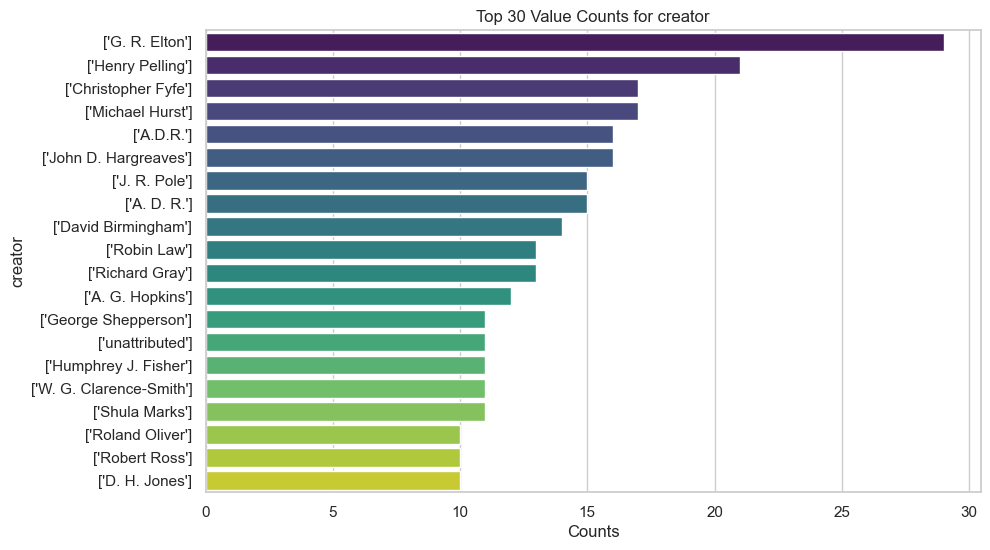

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_41687/1306825961.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


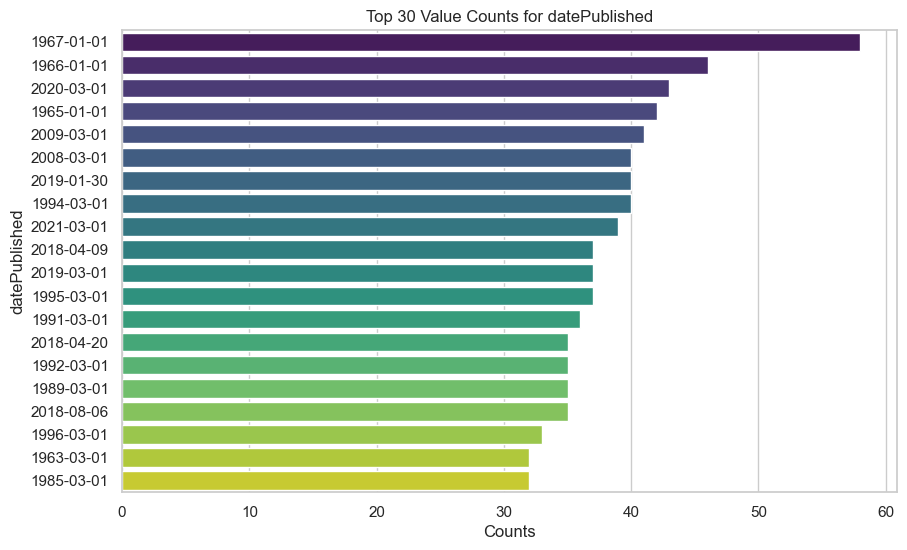

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_41687/1306825961.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


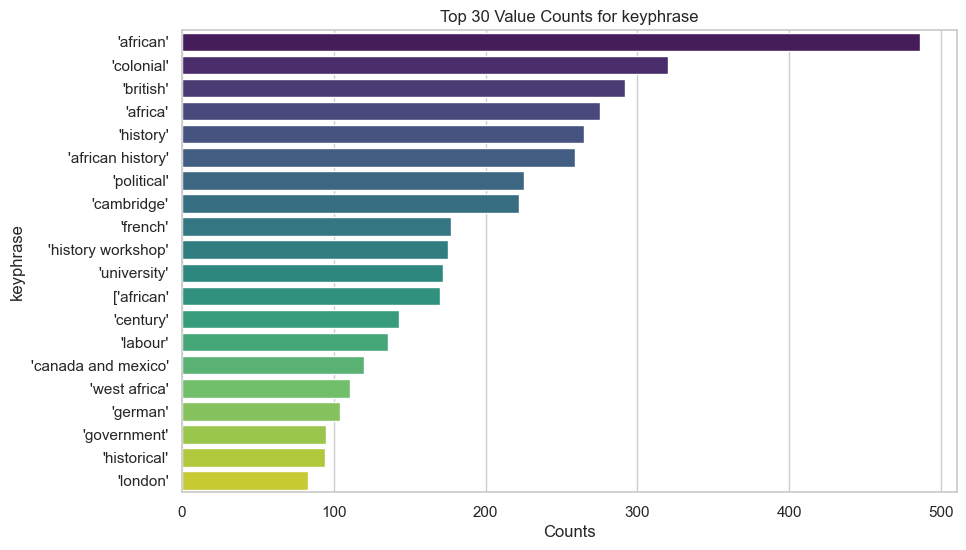

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_41687/1306825961.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=counts.values, x=counts.index, palette='viridis')


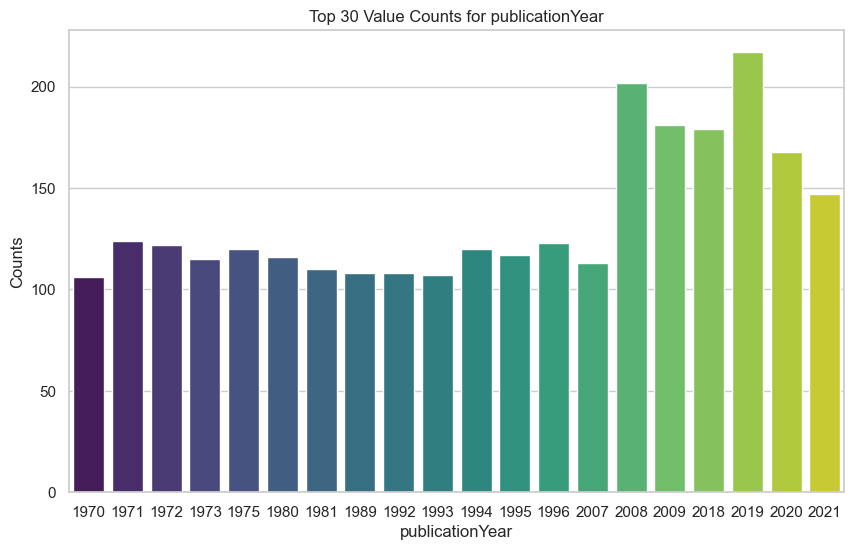

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_41687/1306825961.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


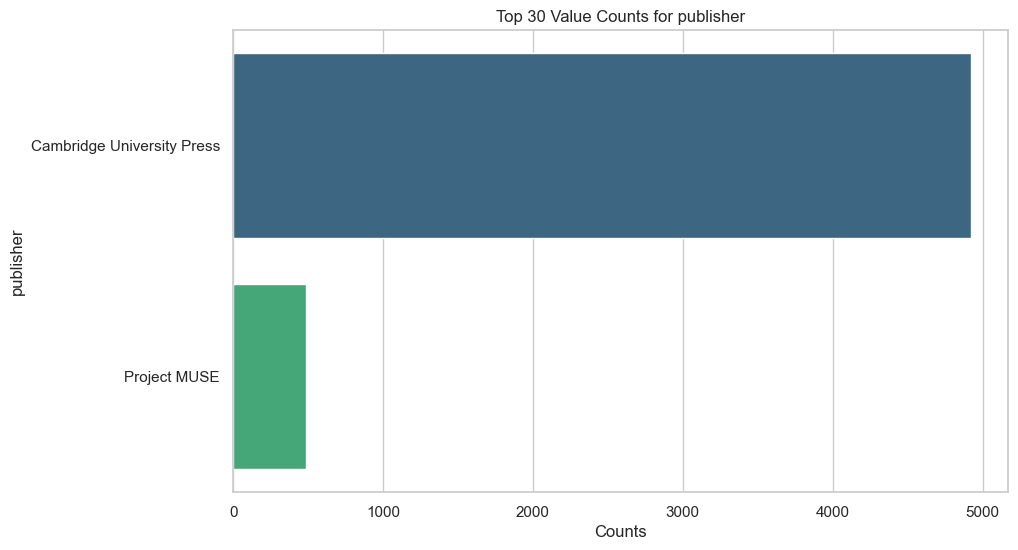

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_41687/1306825961.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


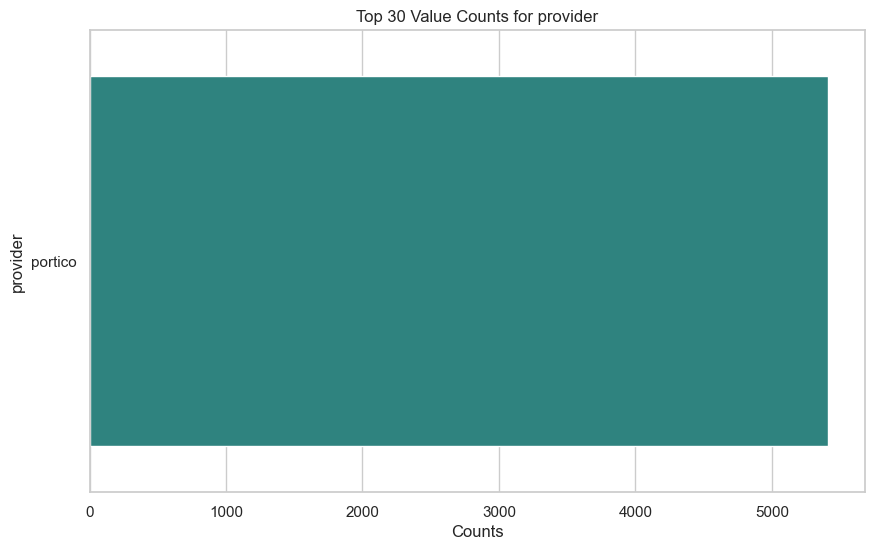

: 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set plot style
sns.set(style="whitegrid")

# Assuming df_filtered is your filtered DataFrame
columns_to_analyze = ['creator', 'datePublished', 'keyphrase', 'publicationYear', 'publisher', 'provider' ]

# Create a dictionary to store the value counts for each column
value_counts = {}

for column in columns_to_analyze:
    if column == 'keyphrase':
        # Flatten the list of keyphrases into individual words
        all_words = df_filtered[column].explode().dropna().tolist()
        word_counts = Counter()
        for phrase in all_words:
            words = phrase.split(', ')
            word_counts.update(words)
        value_counts[column] = pd.Series(word_counts).sort_values(ascending=False)
    else:
        # Convert lists to strings
        df_filtered[column] = df_filtered[column].apply(lambda x: str(x) if isinstance(x, list) else x)
        value_counts[column] = df_filtered[column].value_counts()

# Plot value counts for each column
for column, counts in value_counts.items():
    plt.figure(figsize=(10, 6))
    if column == 'creator':
        counts = counts[1:21]  # Remove the top result
    else:
        counts = counts[:20]
    
    if column == 'publicationYear':
        sns.barplot(y=counts.values, x=counts.index, palette='viridis')
        plt.xlabel(column)
        plt.ylabel("Counts")
    else:
        sns.barplot(x=counts.values, y=counts.index, palette='viridis')
        plt.xlabel("Counts")
        plt.ylabel(column)
    
    plt.title(f"Top 30 Value Counts for {column}")
    plt.show()